# Rekognition

### Subir imagen a bucket

In [26]:
import boto3

s3 = boto3.client('s3')

s3.upload_file('pictures/004_opositores_maduro.jpg', 'mybucket677', '004_opositores_maduro.jpg')

### Deteccion Facial

In [1]:
import boto3
import json

def detect_faces(photo, bucket):

    client=boto3.client('rekognition')

    response = client.detect_faces(Image={'S3Object':{'Bucket':bucket,'Name':photo}},Attributes=['ALL'])

    print('Detected faces for ' + photo)    
    for faceDetail in response['FaceDetails']:
        print('The detected face is between ' + str(faceDetail['AgeRange']['Low']) 
              + ' and ' + str(faceDetail['AgeRange']['High']) + ' years old')

        print('Here are the other attributes:')
        print(json.dumps(faceDetail, indent=4, sort_keys=True))

        # Access predictions for individual face details and print them
        print("Gender: " + str(faceDetail['Gender']))
        print("Smile: " + str(faceDetail['Smile']))
        print("Eyeglasses: " + str(faceDetail['Eyeglasses']))
        print("Emotions: " + str(faceDetail['Emotions'][0]))

    return len(response['FaceDetails'])
def main():
    photo='001_protesta_castillo.jpeg'
    bucket='mybucket677'
    face_count=detect_faces(photo, bucket)
    print("Faces detected: " + str(face_count))


main()
#if __name__ == "__main__":
#    main()


Detected faces for 001_protesta_castillo.jpeg
The detected face is between 42 and 50 years old
Here are the other attributes:
{
    "AgeRange": {
        "High": 50,
        "Low": 42
    },
    "Beard": {
        "Confidence": 70.7021484375,
        "Value": false
    },
    "BoundingBox": {
        "Height": 0.16099277138710022,
        "Left": 0.614829421043396,
        "Top": 0.37372905015945435,
        "Width": 0.0899706482887268
    },
    "Confidence": 99.93518829345703,
    "Emotions": [
        {
            "Confidence": 97.80520629882812,
            "Type": "FEAR"
        },
        {
            "Confidence": 6.87891149520874,
            "Type": "SURPRISED"
        },
        {
            "Confidence": 2.1665616035461426,
            "Type": "SAD"
        },
        {
            "Confidence": 0.39929696917533875,
            "Type": "ANGRY"
        },
        {
            "Confidence": 0.21802352368831635,
            "Type": "HAPPY"
        },
        {
            "

Rostros detectados para 001_protesta_castillo.jpeg
El rostro detectado esta entre 42 y 50 años de edad.
Aqui se listan las emociones detectadas:
* FEAR: 97.80520629882812


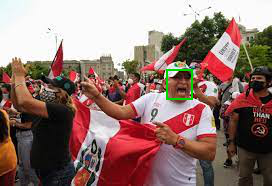

El rostro detectado esta entre 25 y 35 años de edad.
Aqui se listan las emociones detectadas:
* SAD: 95.17479705810547


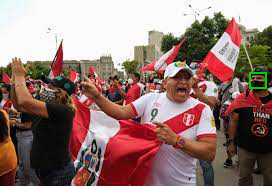

El rostro detectado esta entre 6 y 12 años de edad.
Aqui se listan las emociones detectadas:
* CALM: 91.1932373046875


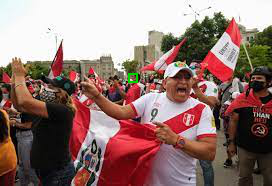

Rostros detectados: 3


In [21]:
import boto3
import io
from PIL import Image, ImageDraw, ExifTags, ImageColor

def show_faces(photo,bucket):
     

    client=boto3.client('rekognition')

    # Load image from S3 bucket
    s3_connection = boto3.resource('s3')
    s3_object = s3_connection.Object(bucket,photo)
    s3_response = s3_object.get()

    stream = io.BytesIO(s3_response['Body'].read())

    
    #Call DetectFaces 
    response = client.detect_faces(Image={'S3Object': {'Bucket': bucket, 'Name': photo}},
        Attributes=['ALL'])
    
    # calculate and display bounding boxes for each detected face       
    print('Rostros detectados para ' + photo)    
    for faceDetail in response['FaceDetails']:
        print('El rostro detectado esta entre ' + str(faceDetail['AgeRange']['Low']) 
              + ' y ' + str(faceDetail['AgeRange']['High']) + ' años de edad.')
        image = Image.open(stream)
        imgWidth, imgHeight = image.size
        draw = ImageDraw.Draw(image)
        box = faceDetail['BoundingBox']
        left = imgWidth * box['Left']
        top = imgHeight * box['Top']
        width = imgWidth * box['Width']
        height = imgHeight * box['Height']

        points = (
            (left,top),
            (left + width, top),
            (left + width, top + height),
            (left , top + height),
            (left, top)

        )
        draw.line(points, fill='#00d400', width=2)
        print('Aqui se listan las emociones detectadas:')
        for emotion in faceDetail['Emotions']:
            if emotion["Confidence"] > 50:
                print(f'* {emotion["Type"]}: {emotion["Confidence"]}')
        # Alternatively can draw rectangle. However you can't set line width.
        #draw.rectangle([left,top, left + width, top + height], outline='#00d400') 
        display(image)
    #image.show()

    return len(response['FaceDetails'])

def main():
    bucket="mybucket677"
    photo="001_protesta_castillo.jpeg"

    faces_count=show_faces(photo,bucket)
    print("Rostros detectados: " + str(faces_count))
    
main()

Rostros detectados para 002_protesta_castillo.jpg
El rostro detectado esta entre 22 y 30 años de edad.
Aqui se listan las emociones detectadas:
* CALM: 89.45905303955078
* SURPRISED: 9.13773250579834
* FEAR: 5.980608940124512
* HAPPY: 2.9949331283569336
* SAD: 2.5284969806671143
* ANGRY: 0.49064111709594727
* CONFUSED: 0.42347511649131775
* DISGUSTED: 0.4080863296985626


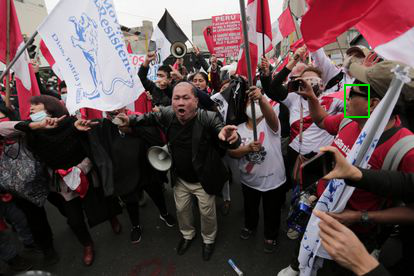

El rostro detectado esta entre 38 y 46 años de edad.
Aqui se listan las emociones detectadas:
* ANGRY: 87.15690612792969
* SURPRISED: 8.653780937194824
* FEAR: 6.540983200073242
* CONFUSED: 3.015709400177002
* SAD: 2.7730016708374023
* DISGUSTED: 1.6881200075149536
* HAPPY: 0.2978672981262207
* CALM: 0.2240268588066101


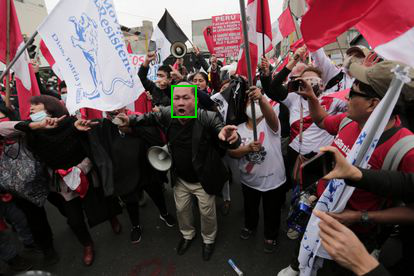

El rostro detectado esta entre 14 y 22 años de edad.
Aqui se listan las emociones detectadas:
* SAD: 61.08218002319336
* CALM: 36.33776092529297
* ANGRY: 21.84925079345703
* FEAR: 7.6422343254089355
* SURPRISED: 7.379759788513184
* CONFUSED: 2.5508761405944824
* HAPPY: 1.8214406967163086
* DISGUSTED: 1.2816892862319946


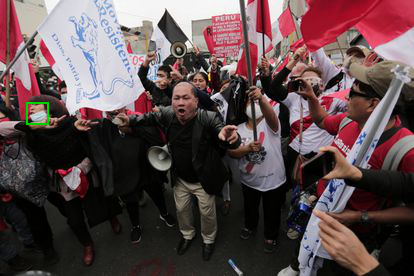

El rostro detectado esta entre 28 y 38 años de edad.
Aqui se listan las emociones detectadas:
* FEAR: 71.85550689697266
* HAPPY: 22.09097671508789
* ANGRY: 8.980890274047852
* SAD: 7.649917125701904
* SURPRISED: 7.490245819091797
* CALM: 1.0898268222808838
* DISGUSTED: 0.7415760159492493
* CONFUSED: 0.26742884516716003


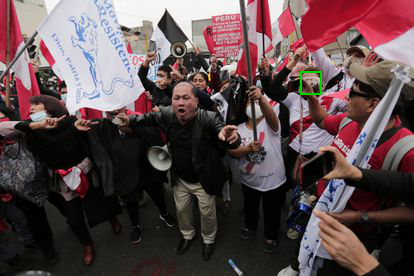

El rostro detectado esta entre 22 y 30 años de edad.
Aqui se listan las emociones detectadas:
* CALM: 33.80815505981445
* HAPPY: 21.669090270996094
* SAD: 11.768012046813965
* CONFUSED: 10.383275985717773
* SURPRISED: 9.760555267333984
* DISGUSTED: 9.295421600341797
* FEAR: 7.111268520355225
* ANGRY: 3.5538461208343506


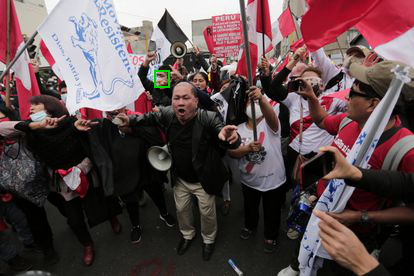

El rostro detectado esta entre 23 y 31 años de edad.
Aqui se listan las emociones detectadas:
* CALM: 57.42276382446289
* SURPRISED: 17.877357482910156
* HAPPY: 17.80436134338379
* FEAR: 7.401823043823242
* SAD: 2.99326753616333
* ANGRY: 2.59696626663208
* DISGUSTED: 1.4738274812698364
* CONFUSED: 0.89818274974823


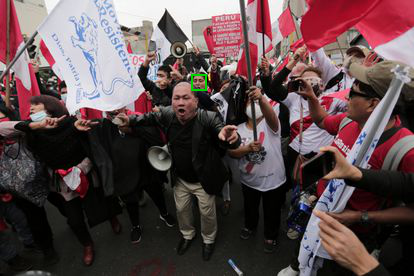

Rostros detectados: 6


In [22]:
import boto3
import io
from PIL import Image, ImageDraw, ExifTags, ImageColor

def show_faces(photo,bucket):
     

    client=boto3.client('rekognition')

    # Load image from S3 bucket
    s3_connection = boto3.resource('s3')
    s3_object = s3_connection.Object(bucket,photo)
    s3_response = s3_object.get()

    stream = io.BytesIO(s3_response['Body'].read())

    
    #Call DetectFaces 
    response = client.detect_faces(Image={'S3Object': {'Bucket': bucket, 'Name': photo}},
        Attributes=['ALL'])
    
    # calculate and display bounding boxes for each detected face       
    print('Rostros detectados para ' + photo)    
    for faceDetail in response['FaceDetails']:
        print('El rostro detectado esta entre ' + str(faceDetail['AgeRange']['Low']) 
              + ' y ' + str(faceDetail['AgeRange']['High']) + ' años de edad.')
        image = Image.open(stream)
        imgWidth, imgHeight = image.size
        draw = ImageDraw.Draw(image)
        box = faceDetail['BoundingBox']
        left = imgWidth * box['Left']
        top = imgHeight * box['Top']
        width = imgWidth * box['Width']
        height = imgHeight * box['Height']

        points = (
            (left,top),
            (left + width, top),
            (left + width, top + height),
            (left , top + height),
            (left, top)

        )
        draw.line(points, fill='#00d400', width=2)
        print('Aqui se listan las emociones detectadas:')
        for emotion in faceDetail['Emotions']:
            if emotion["Confidence"] > 0:
                print(f'* {emotion["Type"]}: {emotion["Confidence"]}')
        # Alternatively can draw rectangle. However you can't set line width.
        #draw.rectangle([left,top, left + width, top + height], outline='#00d400') 
        display(image)
    #image.show()

    return len(response['FaceDetails'])

def main():
    bucket="mybucket677"
    photo="002_protesta_castillo.jpg"

    faces_count=show_faces(photo,bucket)
    print("Rostros detectados: " + str(faces_count))
    
main()